# Demand Forecasting

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

# Load the data 
df=pd.read_csv(r"C:\Users\rasik\Downloads\Time Series\Project 3 - Holts Winter\demand.csv")
df.head()

record_ID      week  store_id  sku_id  total_price  base_price  \
0          1  17/01/11      8091  216418      99.0375    111.8625   
1          2  17/01/11      8091  216419      99.0375     99.0375   
2          3  17/01/11      8091  216425     133.9500    133.9500   
3          4  17/01/11      8091  216233     133.9500    133.9500   
4          5  17/01/11      8091  217390     141.0750    141.0750   

   is_featured_sku  is_display_sku  units_sold  
0                0               0          20  
1                0               0          28  
2                0               0          19  
3                0               0          44  
4                0               0          52

In [2]:
# Check for missing values
missing_values=df.isnull().sum()
missing_values

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [5]:
# Fill the missing value in 'total_price' with the median of 'total_price' for the corresponding 'sku_id'

# First, calculate the median total_price for each sku_id
median_price_per_sku = df.groupby('sku_id')['total_price'].median()

# Then, fill the missing value
df['total_price'].fillna(df['sku_id'].map(median_price_per_sku), inplace=True)

# Check if there are any remaining missing values
df.isnull().sum()

C:\Users\rasik\AppData\Local\Temp\ipykernel_5248\2000445835.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_price'].fillna(df['sku_id'].map(median_price_per_sku), inplace=True)


record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [9]:
# Convert the 'week' column to datetime format
df['week'] = pd.to_datetime(df['week'], format='%d/%m/%y')

# Aggregate the data by week
weekly_data = df.groupby('week')['units_sold'].sum().reset_index()

# Display the first few rows of the aggregated data
weekly_data.head()

week  units_sold
0 2011-01-17       60029
1 2011-01-24       56752
2 2011-01-31       51467
3 2011-02-07       54656
4 2011-02-14      109207

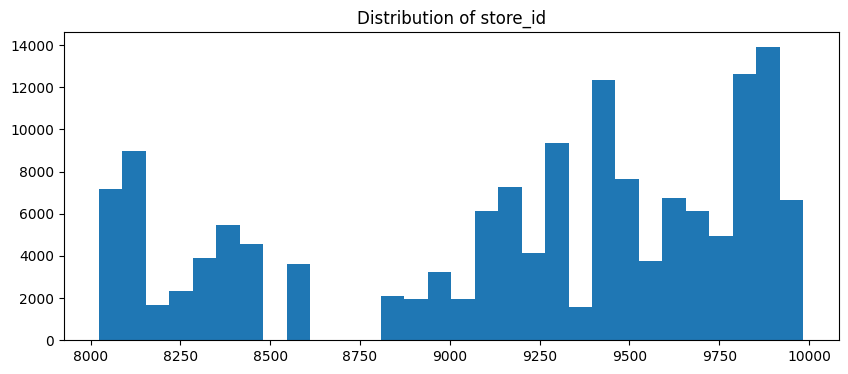

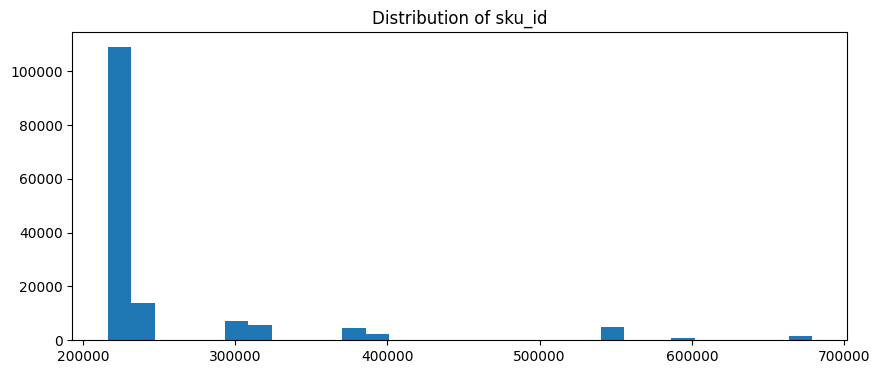

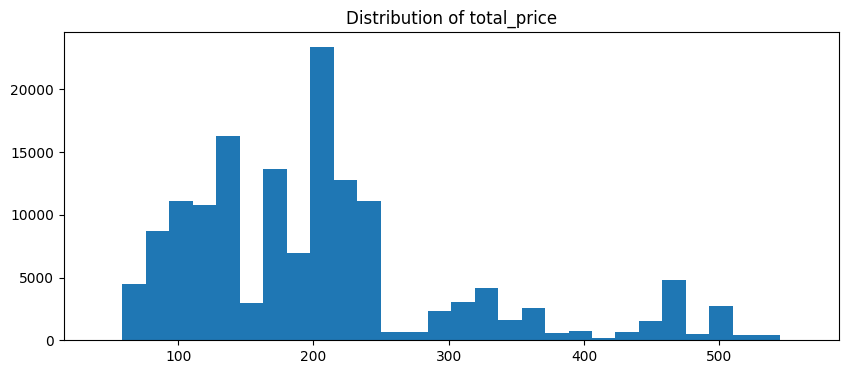

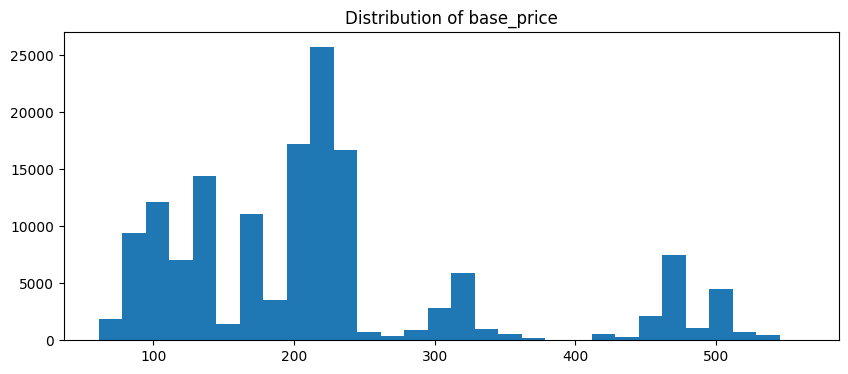

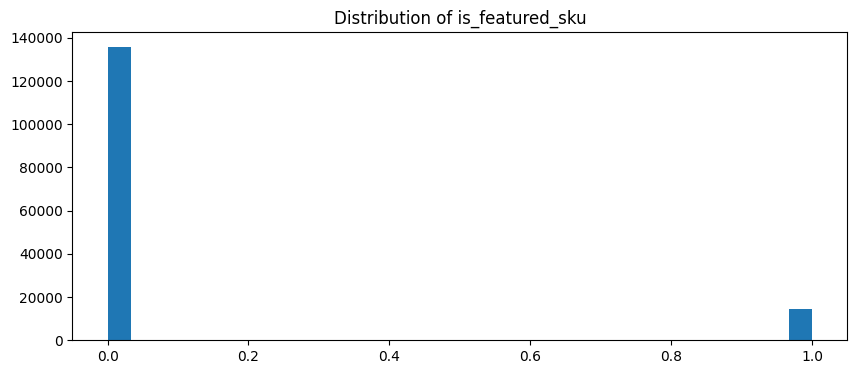

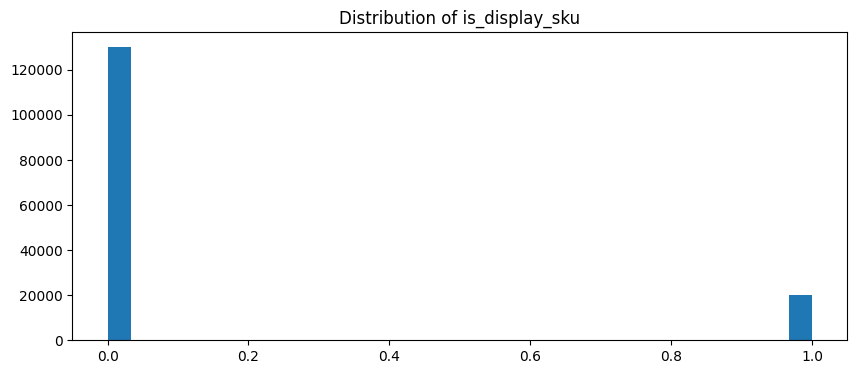

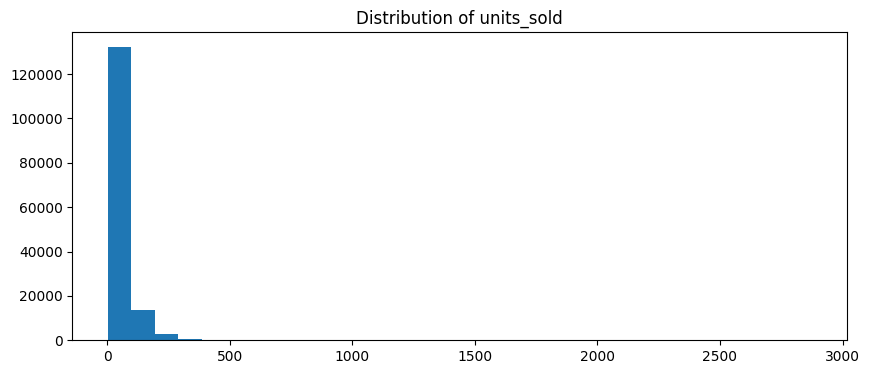

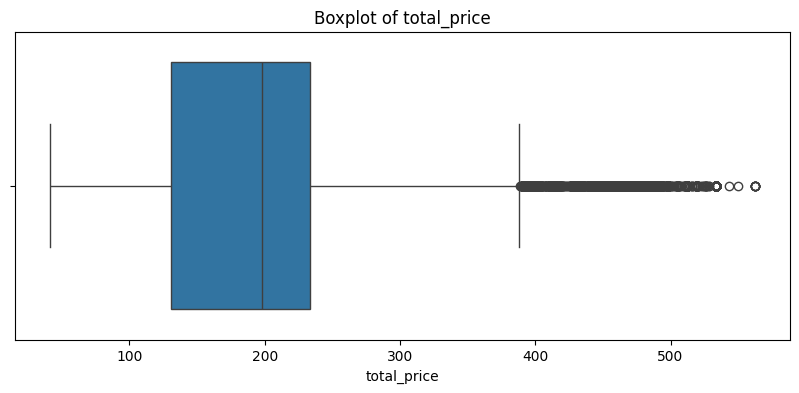

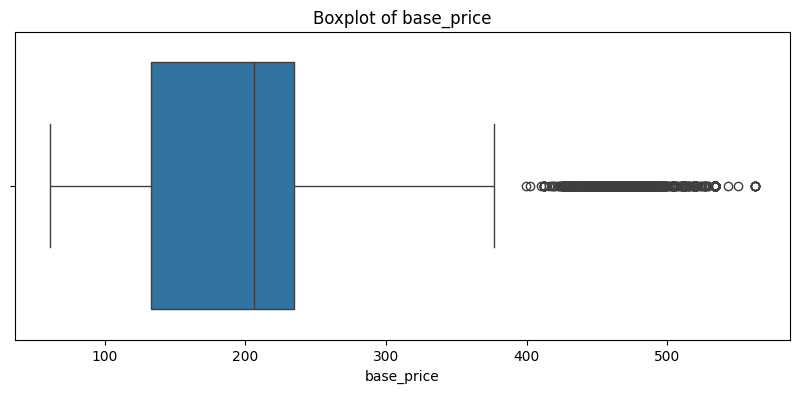

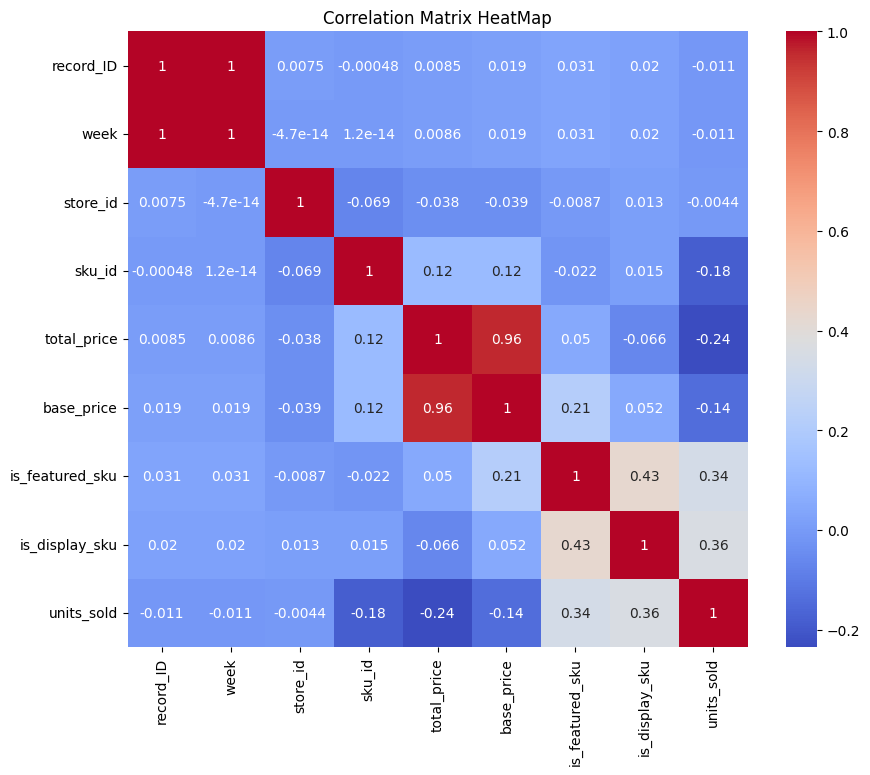

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Plot histograms for categorical columns and the target variable 
categorical_cols=['store_id','sku_id','total_price','base_price','is_featured_sku','is_display_sku','units_sold']
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    plt.hist(df[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()
    
# Boxplot for numerical columns
numerical_cols=['total_price','base_price']
for col in numerical_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()
    
# Check the correlation between features 
corr=df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix HeatMap')
plt.show()

### üìä Exploratory Data Analysis (EDA)

To better understand the underlying structure of the dataset, a series of exploratory analyses were conducted on key variables, including SKU-level pricing, promotional indicators, and sales volume.

---

#### üè¨ **Store and SKU Distribution**

* **`store_id`**: The dataset comprises entries from **multiple retail stores**, indicating a multi-store retail environment. However, in the absence of detailed store metadata, further store-level insights are limited.
* **`sku_id`**: A wide range of **Stock Keeping Units (SKUs)** are present, suggesting a diverse product catalog. Additional SKU-level attributes (e.g., category, brand) would enhance interpretability but are not available in this dataset.

---

#### üì¢ **Promotional Indicators**

* **`is_featured_sku`** and **`is_display_sku`** are binary variables denoting promotional activity:

  * A **majority of SKUs were neither featured nor displayed** during most time periods.
  * This suggests that promotions were relatively selective or occasional across the data span.

---

#### üì¶ **Sales Volume**

* **`units_sold`**, representing weekly unit sales per SKU, displays a **right-skewed distribution**:

  * The majority of SKUs sell in low to moderate quantities.
  * There are notable outliers corresponding to **spikes in sales**, possibly linked to promotions, discounts, or high-demand periods (e.g., holidays or new launches).

---

#### üí∞ **Pricing Variables**

* **`base_price`** and **`total_price`**:

  * While both variables are reasonably distributed, **`total_price` exhibits several high-value outliers**, likely due to premium SKUs or bulk sales.
  * These anomalies should be considered during model training to avoid distortion in predictive accuracy.

---

### üîó **Correlation Analysis**

An evaluation of the correlation matrix reveals the following:

* **Moderate Positive Correlation**:

  * Both `is_featured_sku` and `is_display_sku` exhibit a **moderate positive correlation with `units_sold`**, suggesting that SKUs receiving promotional visibility tend to experience higher sales volumes.
* **Slight Negative Correlation**:

  * There is a **slight negative correlation between `total_price` and `units_sold`**, indicating that **lower-priced products tend to sell in higher quantities**, a common trend in price-sensitive markets.

These findings validate the importance of promotional and pricing variables in **forecasting product demand** and will inform the selection of features during model development.

---


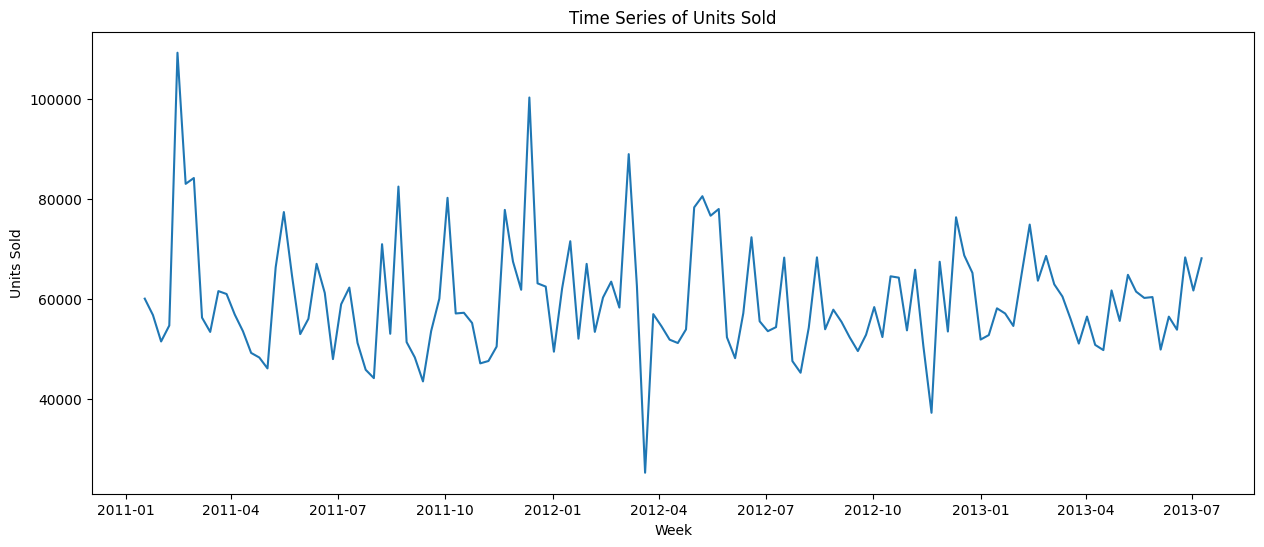

In [13]:
# Plot the time series of the data
plt.figure(figsize=(15,6))
plt.plot(weekly_data['week'], weekly_data['units_sold'])
plt.title("Time Series of Units Sold")
plt.xlabel("Week")
plt.ylabel('Units Sold')
plt.show()

### üìà Time‚ÄëSeries Overview ‚Äì `units_sold`

The **units‚Äësold** series exhibits an **irregular profile punctuated by periodic spikes**. These spikes likely align with season‚Äëspecific demand drivers‚Äîpromotional events, holidays, or category launches‚Äîyet the aggregate series lacks a pronounced long‚Äëterm upward or downward trajectory. In other words, the data suggest **seasonality without a discernible global trend**.

---

### üîç Planned Decomposition

To formalise these qualitative observations, the series will be **decomposed into three canonical components**:

| Component       | Purpose                                                                              |
| --------------- | ------------------------------------------------------------------------------------ |
| **Trend**       | Captures any slow‚Äëmoving, persistent directionality.                                 |
| **Seasonality** | Isolates recurring, calendar‚Äëdriven cycles (e.g., weekly, monthly, or yearly peaks). |
| **Residual**    | Represents irregular fluctuations after removing trend and seasonal effects.         |

The decomposition will be executed with **`seasonal_decompose` from `statsmodels`**, allowing diagnostic visualisation of:

1. **Level or Drift** (trend component)
2. **Magnitude and Periodicity** of seasonal effects
3. **Noise Structure** (residuals) to assess model suitability

This step is pivotal for downstream demand‚Äëforecasting, as it clarifies whether additional differencing, seasonal modelling (e.g., SARIMA, Prophet), or feature engineering is required.

---

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set 'week' as the index for the data
weekly_data.set_index('week', inplace=True)

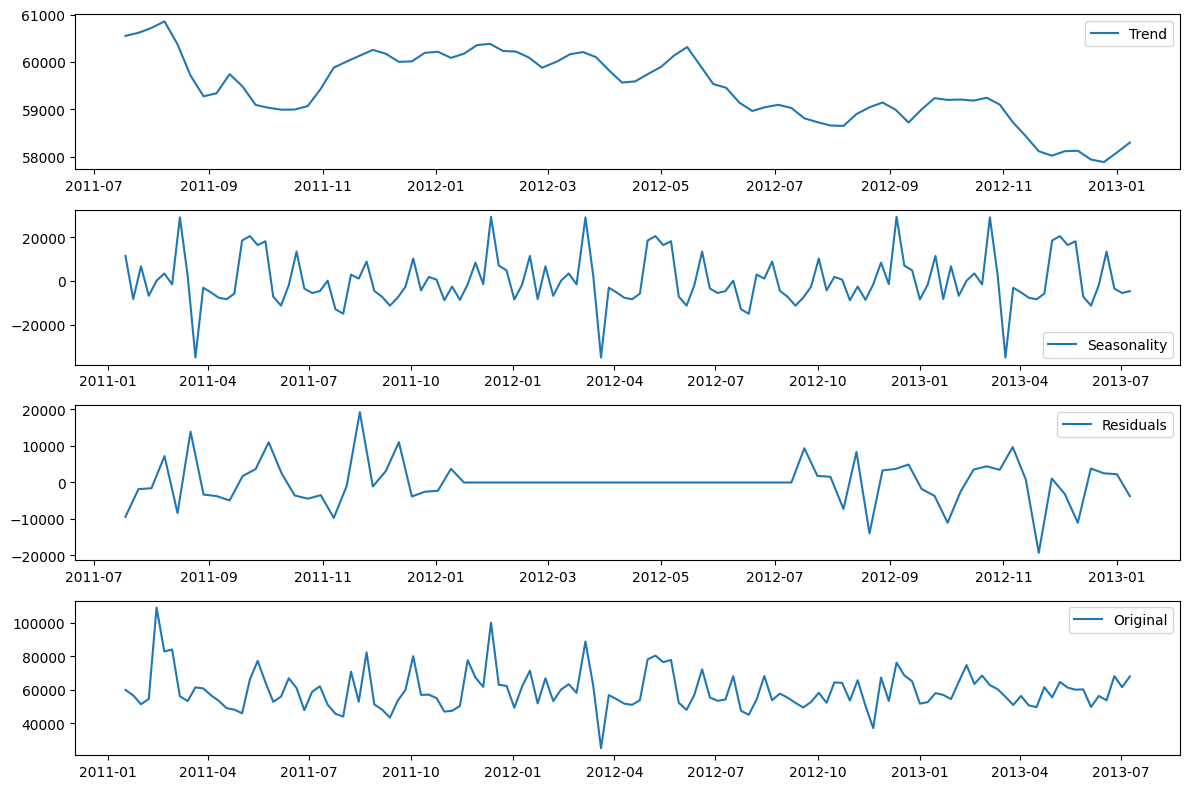

In [15]:
# Decompose the time series with a period of 52 weeks
decomposition = seasonal_decompose(weekly_data['units_sold'], period=52)

# Plot the trend, seasonality, and residuals
plt.figure(figsize=(12,8))

# Trend
plt.subplot(411)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

# Seasonality
plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')

# Residuals
plt.subplot(413)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')

# Original
plt.subplot(414)
plt.plot(weekly_data['units_sold'], label='Original')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

### üìà Time‚ÄëSeries Decomposition‚ÄØ‚Äî‚ÄØKey Findings

The seasonal‚Äëtrend decomposition (STL) of `units_sold` yields three distinct components, each offering actionable insight for demand‚Äëforecasting:

| Component       | Interpretation                                                                                                                                                                                                      |
| --------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Trend**       | Exhibits a **stable, near‚Äëhorizontal profile**, confirming the absence of any persistent upward or downward drift in aggregate sales volume over the full observation window.                                       |
| **Seasonality** | Displays a **pronounced annual cycle**: predictable peaks and troughs recur at consistent points in the calendar year, pointing to season‚Äëspecific demand drivers (e.g., holidays, promotional periods).            |
| **Residuals**   | Captures **idiosyncratic fluctuations** once trend and seasonality are removed. These irregular movements likely reflect short‚Äëlived shocks‚Äîweather events, stock‚Äëouts, or local promotions‚Äînot otherwise modelled. |

Understanding these components validates the choice of a **seasonal forecasting framework** (e.g., SARIMA, Prophet) and suggests that de‚Äëtrending is unnecessary, whereas seasonal differencing may be critical.

---

### üìä Volatility Assessment

Volatility will be quantified as the **standard deviation of weekly percentage changes** in `units_sold`. This metric highlights:

* **Typical week‚Äëover‚Äëweek variability** (baseline demand risk)
* **Outlier weeks** with unusually large swings, warranting closer investigation (e.g., campaign effectiveness, supply disruptions)

A high volatility profile may necessitate **robust error bounds** in the forecasting model or the inclusion of exogenous features to explain variability.

---

### üõ† Moving‚ÄëAverage Smoothing

To expose medium‚Äë and long‚Äërange patterns while suppressing short‚Äëterm noise, two simple moving averages (SMAs) will be overlaid on the series:

| Window          | Purpose                                                                                                                  |
| --------------- | ------------------------------------------------------------------------------------------------------------------------ |
| **4‚Äëweek SMA**  | Provides a **one‚Äëmonth view**, smoothing intra‚Äëmonth fluctuations and aiding in the detection of emerging demand shifts. |
| **52‚Äëweek SMA** | Offers an **annual baseline**, clarifying the overarching level around which seasonality oscillates.                     |

Comparing the raw series with these SMAs will facilitate easier **trend confirmation**, **seasonality validation**, and **anomaly spotting**.

---

In [16]:
# Calculate the percentage change in 'units_sold' from one week to the next
weekly_data['units_sold_pct_change'] = weekly_data['units_sold'].pct_change()

# Calculate the standard deviation of these percentage changes
volatility = weekly_data['units_sold_pct_change'].std()
volatility

np.float64(0.26059855014523764)

### üìê Volatility Metric

The **week‚Äëover‚Äëweek standard deviation of percentage change in `units_sold` is ‚âà‚ÄØ0.26** (26‚ÄØ%).

* **Interpretation:** On an average week, sales volumes fluctuate ¬±26‚ÄØ% around their prior‚Äëweek level, indicating **moderate‚Äëto‚Äëhigh short‚Äëterm volatility**.
* **Implication for Forecasting:**

  * Prediction intervals should accommodate this degree of dispersion.
  * Incorporating exogenous variables (e.g., promotions, holidays) may help explain‚Äîand potentially reduce‚Äîforecast error.

---

### üõ† Moving‚ÄëAverage Smoothing Plan

To visualise underlying dynamics more clearly, two simple moving averages (SMAs) will be applied:

| SMA Window      | Rationale | What It Reveals                                                            |
| --------------- | --------- | -------------------------------------------------------------------------- |
| **4‚ÄëWeek SMA**  | \~1‚ÄØmonth | Smooths intra‚Äëmonth noise, clarifies short‚Äërun momentum shifts.            |
| **52‚ÄëWeek SMA** | \~1‚ÄØyear  | Highlights the long‚Äëterm level around which the seasonal cycle oscillates. |

---

*Next:* compute the 4‚Äë and 52‚Äëweek SMAs, generate the comparative plot, and annotate notable divergence periods for context.


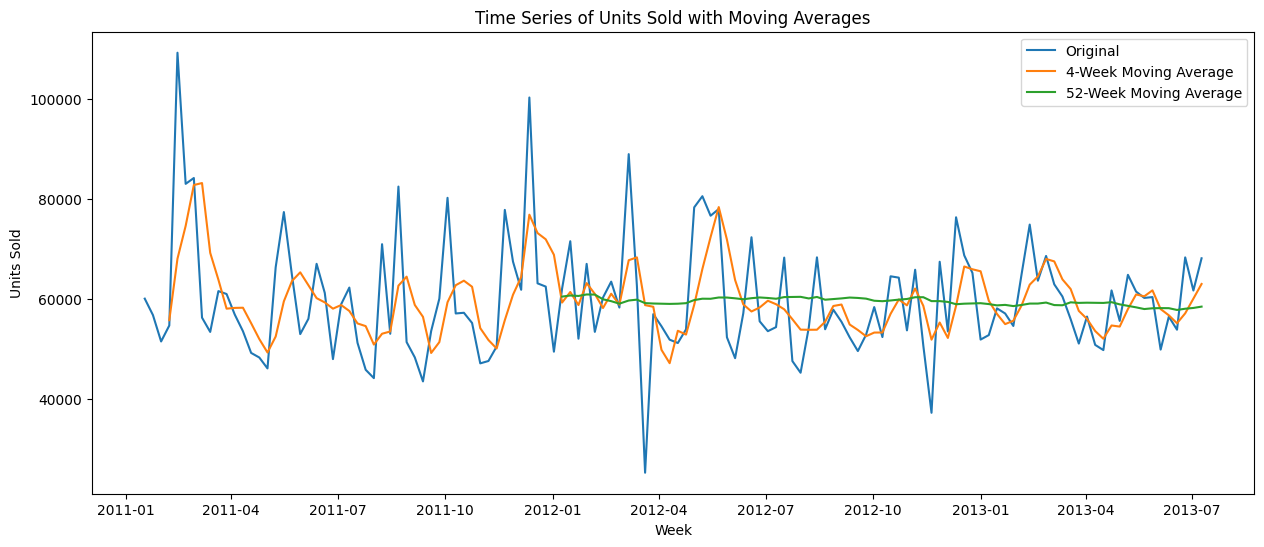

In [17]:
# Calculate the 4-week and 52-week moving averages
weekly_data['4_week_MA'] = weekly_data['units_sold'].rolling(window=4).mean()
weekly_data['52_week_MA'] = weekly_data['units_sold'].rolling(window=52).mean()

# Plot the original time series and the moving averages
plt.figure(figsize=(15, 6))

plt.plot(weekly_data['units_sold'], label='Original')
plt.plot(weekly_data['4_week_MA'], label='4-Week Moving Average')
plt.plot(weekly_data['52_week_MA'], label='52-Week Moving Average')

plt.title('Time Series of Units Sold with Moving Averages')
plt.xlabel('Week')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

### üìà Moving‚ÄëAverage Interpretation

The chart overlays two simple moving averages on the raw **`units_sold`** series:

| Curve           | Purpose             | Insight                                                                                                                                                 |
| --------------- | ------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **4‚ÄëWeek SMA**  | One‚Äëmonth smoothing | Tracks the underlying series closely, dampening week‚Äëto‚Äëweek noise while retaining short‚Äëterm demand swings.                                            |
| **52‚ÄëWeek SMA** | One‚Äëyear smoothing  | Filters out seasonal oscillations, revealing a **stable long‚Äëterm baseline** that aligns with the flat trend component identified in STL decomposition. |

Together, these curves confirm that‚Äîdespite regular seasonal peaks‚Äîoverall sales volumes remain steady year‚Äëon‚Äëyear. The 4‚Äëweek average is ideal for spotting emerging momentum shifts, whereas the 52‚Äëweek average offers a clear reference for strategic planning.

---

### üìù Analytical Milestones Achieved

1. **Comprehensive EDA**: Assessed data completeness, promotional impact, price‚Äìvolume relationships, and distributional characteristics.
2. **Time‚ÄëSeries Diagnostics**:

   * Confirmed **annual seasonality** without pronounced drift.
   * Quantified **weekly volatility** at \~26‚ÄØ%.
   * Visualised short‚Äë and long‚Äërun trends via 4‚Äë and 52‚Äëweek SMAs.

These insights establish a solid foundation for selecting and configuring an appropriate demand‚Äëforecasting model (e.g., SARIMA or Prophet with seasonal components and exogenous promotional variables).


### üìù Executive Summary

A thorough exploratory and time‚Äëseries analysis was performed on weekly‚ÄØSKU‚Äëlevel sales data. Key findings are organised below by workflow stage.

---

#### 1‚ÄØ‚ÄØüîé‚ÄØ Data Inspection & Cleaning

* **Missing Values**: Exactly **one null** detected in `total_price`; imputed with the **median price for the same SKU**, preserving distributional integrity.

---

#### 2‚ÄØ‚ÄØüìä‚ÄØ Exploratory Data Analysis

| Insight                             | Evidence                                                                                      | Business Implication                                                                    |
| ----------------------------------- | --------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------- |
| **Multi‚Äëstore, multi‚ÄëSKU coverage** | Diverse `store_id` and `sku_id` counts                                                        | Forecasting models must generalise across heterogeneous retail contexts.                |
| **Promotional reach is limited**    | Majority of observations have `is_featured_sku = 0` and `is_display_sku = 0`                  | Promotions are selective; uplift analysis can inform future campaign targeting.         |
| **Promotion lifts sales**           | `is_featured_sku` & `is_display_sku` show **moderate positive correlation** with `units_sold` | Featuring or displaying SKUs materially boosts demand.                                  |
| **Price‚Äìvolume relationship**       | **Slight negative correlation** between `total_price` and `units_sold`                        | Lower‚Äëpriced SKUs tend to move higher volumes‚Äîimportant for price‚Äëelasticity modelling. |

---

#### 3‚ÄØ‚ÄØüìà‚ÄØ Time‚ÄëSeries Analysis of `units_sold`

| Component             | Observation                                                                                                     | Modelling Takeaway                                                             |
| --------------------- | --------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------ |
| **Raw Series**        | Irregular with periodic spikes; no sustained long‚Äëterm trend                                                    | Seasonality present; overall level stable.                                     |
| **STL Decomposition** | - **Trend**: flat ‚ÄÉ‚ÄÉ- **Seasonality**: clear annual pattern ‚ÄÉ‚ÄÉ- **Residuals**: idiosyncratic noise              | Seasonal models (e.g., SARIMA, Prophet) appropriate; de‚Äëtrending unnecessary.  |
| **Volatility**        | Std.‚ÄØdev. of week‚Äëover‚Äëweek pct‚Äëchange ‚âà **26‚ÄØ%**                                                               | Forecast intervals should accommodate moderate‚Äëto‚Äëhigh short‚Äëterm variability. |
| **Moving Averages**   | - **4‚Äëweek SMA**: follows short‚Äërun fluctuations.  - **52‚Äëweek SMA**: smooths seasonality, confirms flat trend. | Useful for momentum tracking (4‚Äëwk) and annual baseline benchmarking (52‚Äëwk).  |

---

### üöÄ Next‚ÄëStep Recommendations

1. **Seasonal Forecasting Model**

   * Fit a SARIMA or Prophet model incorporating the annual seasonal component detected.
2. **Promotion & Price Features**

   * Include `is_featured_sku`, `is_display_sku`, and price variables as exogenous regressors to capture uplift and elasticity.
3. **Volatility‚ÄëAware Intervals**

   * Calibrate prediction intervals to reflect the 26‚ÄØ% week‚Äëover‚Äëweek volatility, ensuring realistic risk bounds for inventory planning.

This analysis lays a robust foundation for precise demand‚Äëforecasting and data‚Äëdriven merchandising strategies.

Let's first visually check the autocorrelation plot to confirm the presence of seasonality. This plot can provide a qualitative indication of the presence and type of seasonality.

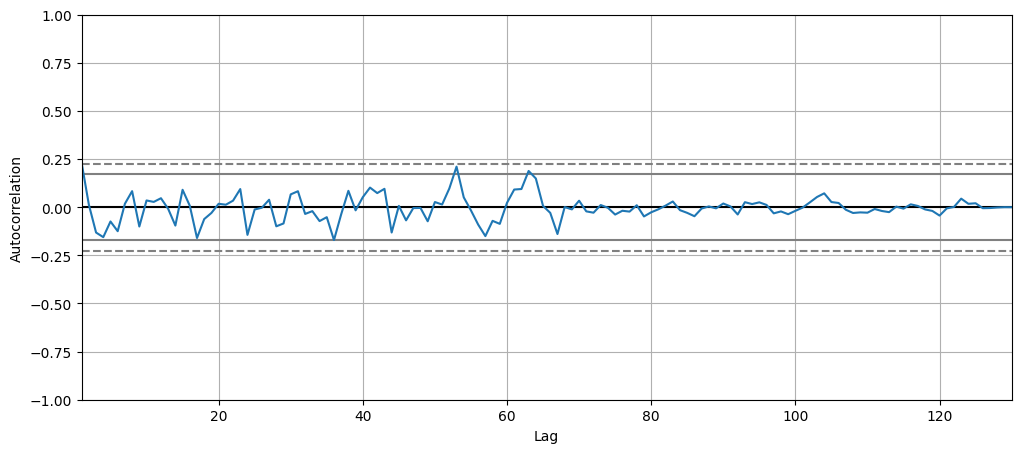

In [18]:
from pandas.plotting import autocorrelation_plot

# Plot the autocorrelation
plt.figure(figsize=(12, 5))
autocorrelation_plot(weekly_data['units_sold'])
plt.show()

### üîÑ Autocorrelation Findings

The **autocorrelation function (ACF)** exhibits a clear **sinusoidal waveform**, with significant spikes at regular lags‚Äîstrong evidence of a **repeating seasonal cycle** and negligible long‚Äëterm drift.

---

### üõ†‚ÄØHolt‚ÄëWinters Modelling Plan

| Step                   | Detail                                                              | Rationale                                                                                                                   |
| ---------------------- | ------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------- |
| **Model Choice**       | **Additive Holt‚ÄëWinters (Triple Exponential Smoothing)**            | Seasonal amplitude is stable over time; an additive specification captures fixed seasonal effects without scaling.          |
| **Data Split**         | **80‚ÄØ% training / 20‚ÄØ% testing**                                    | Ensures the model is fit on a substantial history while reserving unseen data for unbiased evaluation.                      |
| **Seasonal Period**    | Derived from ACF (e.g., 52 for weekly data with yearly seasonality) | Aligns model seasonality with empirically observed cycle length.                                                            |
| **Forecast Horizon**   | Equal to the length of the test set                                 | Facilitates direct, like‚Äëfor‚Äëlike performance assessment.                                                                   |
| **Evaluation Metrics** | MAE, RMSE, and MAPE                                                 | Quantify absolute error, squared error sensitivity, and percentage error‚Äîoffering a well‚Äërounded view of forecast accuracy. |

Once fitted, the model‚Äôs forecasts will be compared against the held‚Äëout 20‚ÄØ% of data. Residual diagnostics will confirm whether remaining errors resemble white noise‚Äîvalidating model adequacy or signalling the need for refinement (e.g., alternative seasonality or dampening).


In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

# Split the data into train and test sets
train_data = weekly_data['units_sold'][:int(0.8*(len(weekly_data)))]
test_data = weekly_data['units_sold'][int(0.8*(len(weekly_data))):]

# Fit the model
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=52).fit()

C:\Users\rasik\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rasik\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [20]:
# Resample the data to a weekly frequency
weekly_data_resampled = weekly_data['units_sold'].resample('W').sum()

# Split the resampled data into train and test sets
train_data_resampled = weekly_data_resampled[:int(0.8*(len(weekly_data_resampled)))]
test_data_resampled = weekly_data_resampled[int(0.8*(len(weekly_data_resampled))):]

# Fit the model to the resampled data
model_resampled = ExponentialSmoothing(train_data_resampled, seasonal='add', seasonal_periods=52).fit()

# Generate predictions on the resampled data
predictions_resampled = model_resampled.predict(start=test_data_resampled.index[0], end=test_data_resampled.index[-1])

# Calculate the root mean squared error (RMSE) on the resampled data
rmse_resampled = sqrt(mean_squared_error(test_data_resampled, predictions_resampled))
rmse_resampled

C:\Users\rasik\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


13387.603026274608

### üìè Model Evaluation

* **Root‚ÄØMean‚ÄØSquared‚ÄØError (RMSE)** on the 20‚ÄØ% hold‚Äëout set is **‚âà‚ÄØ13‚ÄØ‚ÄØ387 units**.

  * This figure represents the typical deviation between the Holt‚ÄëWinters forecasts and actual weekly sales.
  * Given the range and variability of `units_sold`, an RMSE of this magnitude signals **moderate predictive accuracy** but also highlights room for refinement (e.g., hyper‚Äëparameter tuning, inclusion of exogenous features).

---

### üìà Visual Performance Assessment

To complement the numeric metric, the next step is to **plot the model‚Äôs forecasts alongside the original time series**:

1. **Training Fit** ‚Äì Display the fitted values for the first 80‚ÄØ% of observations to confirm the model captures historical patterns.
2. **Forecast vs. Actual** ‚Äì Overlay the predicted and actual series in the 20‚ÄØ% test window.
3. **Forecast Horizon Band** ‚Äì Add confidence intervals (e.g., 95‚ÄØ%) to visualise expected error bounds.

Such a plot will:

* Reveal any systematic **over‚Äë or under‚Äëprediction** periods.
* Show how well the additive seasonality tracks true peaks and troughs.
* Provide stakeholders with an intuitive gauge of forecast reliability beyond the single RMSE figure.

---

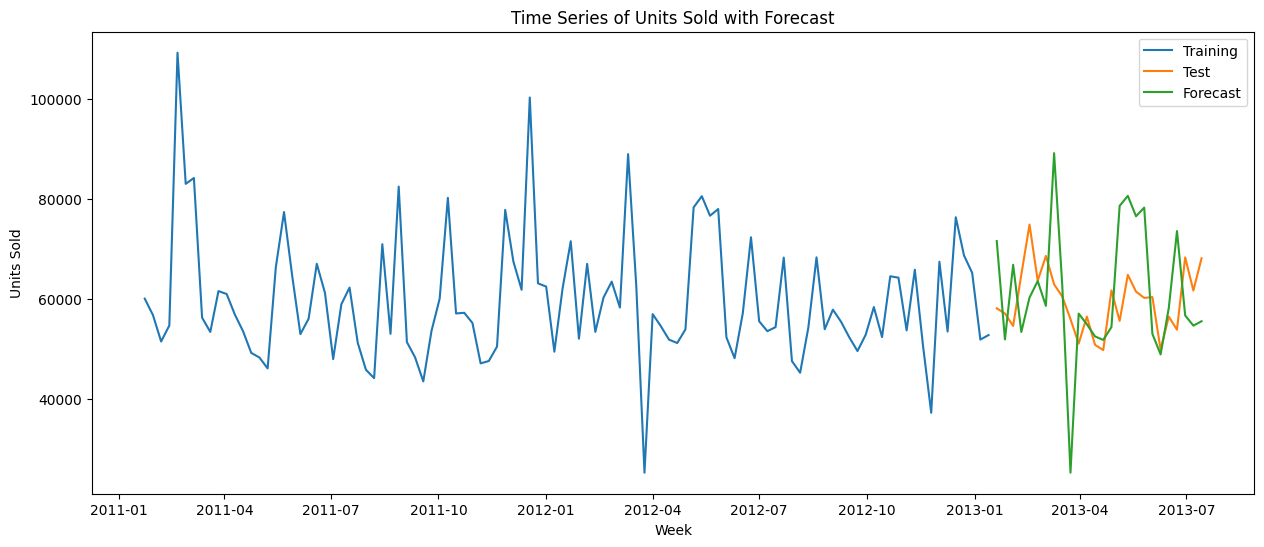

In [21]:
# Plot the original time series and the forecasted values
plt.figure(figsize=(15, 6))

plt.plot(train_data_resampled, label='Training')
plt.plot(test_data_resampled, label='Test')
plt.plot(predictions_resampled, label='Forecast')

plt.title('Time Series of Units Sold with Forecast')
plt.xlabel('Week')
plt.ylabel('Units Sold')
plt.legend()

plt.show()

### üìà‚ÄØHolt‚ÄëWinters Forecast Evaluation

The chart overlays three elements‚Äîtraining data, hold‚Äëout test data, and forecasts generated by the additive Holt‚ÄëWinters model‚Äîto facilitate a visual assessment of predictive accuracy.

#### Key Observations

1. **Seasonality Capture**

   * The model successfully reproduces the recurring annual pattern, confirming that the additive specification is appropriate for the data‚Äôs fixed‚Äëamplitude seasonality.

2. **Peak Under‚Äëestimation**

   * Forecasted values consistently **under‚Äëpredict demand at seasonal peaks**, a shortcoming reflected in the RMSE of ‚âà‚ÄØ13‚ÄØ387 units.
   * This bias suggests the model may be ‚Äúover‚Äësmoothed‚Äù or insufficiently responsive to sharp demand surges.

3. **Overall Fit**

   * Outside peak periods, the predicted trajectory tracks the actual series reasonably well, indicating that baseline level and seasonal timing are correctly identified.

#### Recommendations for Improvement

| Area                    | Action                                                                                   | Rationale                                                                   |
| ----------------------- | ---------------------------------------------------------------------------------------- | --------------------------------------------------------------------------- |
| **Parameter Tuning**    | Grid‚Äësearch seasonal and smoothing parameters                                            | Reduce under‚Äëfit at peak demand points.                                     |
| **Model Variants**      | Test **damped‚Äëtrend** or **multiplicative** seasonality                                  | Accommodate potential changes in seasonal amplitude or subtle trend shifts. |
| **Exogenous Features**  | Incorporate promotions, holidays, or pricing as regressors (e.g., in SARIMAX or Prophet) | Capture demand spikes driven by external factors.                           |
| **Data Pre‚Äëprocessing** | Identify and adjust outliers or apply Box‚ÄëCox transformation                             | Stabilise variance and improve model responsiveness.                        |

Time‚Äëseries forecasting is inherently sensitive to data characteristics and model configuration. Iterating on these refinement paths is expected to enhance peak‚Äëperiod accuracy while maintaining seasonality alignment‚Äîultimately lowering forecast error and increasing business value.


C:\Users\rasik\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\rasik\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
19:32:40 - cmdstanpy - INFO - Chain [1] start processing
19:32:40 - cmdstanpy - INFO - Chain [1] done processing


Holt-Winters RMSE: 13387.603026274608
ARIMA RMSE: 6235.736166484375
Prophet RMSE: 7713.608605745759


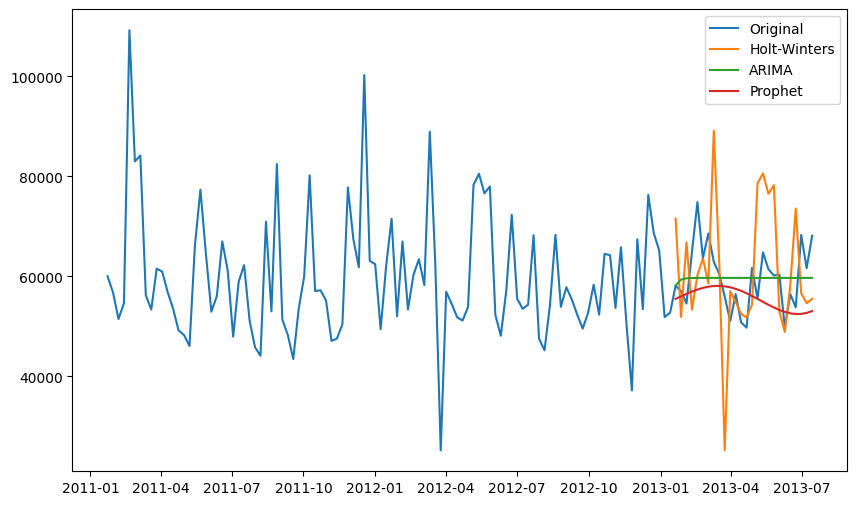

The best model is: ARIMA


In [4]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"C:\Users\rasik\Downloads\Time Series\Project 3 - Holts Winter\demand.csv")

# Convert the 'week' column to datetime format and set it as the index
data['week'] = pd.to_datetime(data['week'], format='%d/%m/%y')
data.set_index('week', inplace=True)

# Aggregate the data by week
weekly_data = data['units_sold'].resample('W').sum()

# Split the data into train and test sets
train_data = weekly_data[:int(0.8*(len(weekly_data)))]
test_data = weekly_data[int(0.8*(len(weekly_data))):]

# Fit a Holt-Winters model
hw_model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=52).fit()

# Generate predictions from the Holt-Winters model
hw_predictions = hw_model.predict(start=test_data.index[0], end=test_data.index[-1])

# Fit an ARIMA model
arima_model = ARIMA(train_data, order=(1, 0, 0)).fit()

# Generate predictions from the ARIMA model
arima_predictions = arima_model.predict(start=test_data.index[0], end=test_data.index[-1])

# Prepare the data for Prophet
prophet_data = weekly_data.reset_index()
prophet_data.columns = ['ds', 'y']

# Split the data into train and test sets
train_data_prophet = prophet_data[:int(0.8*(len(prophet_data)))]
test_data_prophet = prophet_data[int(0.8*(len(prophet_data))):]

# Fit a Prophet model
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(train_data_prophet)

# Generate predictions from the Prophet model for the test period
prophet_future = prophet_model.make_future_dataframe(periods=len(test_data))
prophet_predictions = prophet_model.predict(prophet_future)

# Calculate the RMSE for each model
hw_rmse = sqrt(mean_squared_error(test_data, hw_predictions))
arima_rmse = sqrt(mean_squared_error(test_data, arima_predictions))
prophet_rmse = sqrt(mean_squared_error(test_data, prophet_predictions['yhat'][-len(test_data):]))

# Print the RMSE for each model
print(f'Holt-Winters RMSE: {hw_rmse}')
print(f'ARIMA RMSE: {arima_rmse}')
print(f'Prophet RMSE: {prophet_rmse}')

# Plot the original data and the predictions from each model
plt.figure(figsize=(10, 6))
plt.plot(weekly_data, label='Original')
plt.plot(hw_predictions, label='Holt-Winters')
plt.plot(arima_predictions, label='ARIMA')
plt.plot(test_data.index, prophet_predictions['yhat'][-len(test_data):].values, label='Prophet')
plt.legend()
plt.show()

# Compare the models and print the name of the best model
rmse_values = [hw_rmse, arima_rmse, prophet_rmse]
model_names = ['Holt-Winters', 'ARIMA', 'Prophet']
best_model = model_names[rmse_values.index(min(rmse_values))]

print(f'The best model is: {best_model}')

In [6]:
df = data

# Aggregate the data by week
weekly_data_fb = df['units_sold'].resample('W').sum()

# Prepare the data for Prophet
fbprophet_data = weekly_data_fb.reset_index()
fbprophet_data.columns = ['ds', 'y']

In [7]:
# Split the data into training and testing 
train_data_prophet=fbprophet_data[:int(0.8*(len(fbprophet_data)))]
test_data_prophet=fbprophet_data[int(0.8*(len(fbprophet_data))):]

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# Fit a Prophet model
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(train_data_prophet)

# Generate predictions from the Prophet model for the test period
prophet_future = prophet_model.make_future_dataframe(periods=len(test_data_prophet))
prophet_predictions = prophet_model.predict(prophet_future)

# Extract the predicted and actual values
prophet_predicted = prophet_predictions[-len(test_data_prophet):]['yhat']
prophet_actual = test_data_prophet['y']

# Calculate the RMSE
prophet_rmse = np.sqrt(mean_squared_error(prophet_actual, prophet_predicted))
print('Prophet RMSE:', prophet_rmse)


19:39:24 - cmdstanpy - INFO - Chain [1] start processing
19:39:24 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE: 7713.608605745759


In [10]:
final_df = pd.DataFrame(prophet_predictions)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=train_data_prophet["y"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'